## Regression Assignment: Predicting CO2 Emissions Using Other Variables (for a given year)

Let's now try to build a regression model to predict CO2 emissions using other variables (for any given year). This will help us in understanding which variables affect CO2 emissions. This understanding can then be used by, for example, organisations/authorities such as the UN, governments etc. to create regulatory policies etc.

In [38]:
# total co2 emissions of various countries (for a given year)
# note that this is co2 emissions per person (tonnes per person) for a given year
year = "2014"
total_co2 = pd.read_csv("co2_prediction/yearly_co2_emissions_1000_tonnes.csv")
total_co2 = total_co2[["geo", year]]
total_co2.columns = ["geo", "co2"]
print(total_co2.shape)
total_co2.head()

(192, 2)


,geo,co2
0,Afghanistan,9810.0
1,Albania,5720.0
2,Algeria,145000.0
3,Andorra,462.0
4,Angola,34800.0


In [39]:
# median value
median_co2 = total_co2["co2"].median()
median_co2

11300.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <a list of 96 Text xticklabel objects>)

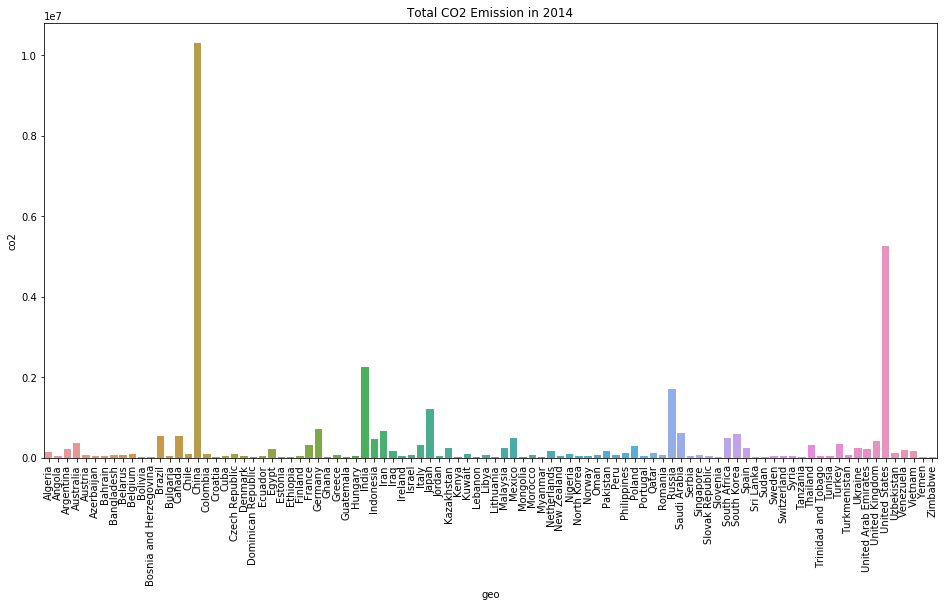

In [40]:
# plot co2 emissions by country
total_co2 = total_co2[total_co2["co2"] > median_co2]
plt.figure(figsize=(16, 8))
sns.barplot(x="geo", y="co2", data=total_co2)
plt.title("Total CO2 Emission in {}".format(year))
plt.xticks(rotation=90)

The top three countries in terms of total CO2 emissions are China, the US, and India. If this makes you think that these three countries are the main culprits in global warming, think again. What we've plotted above is the total CO2 emissions, which will be high for countries with higher populations. 

A better variable to consider is the CO2 emission *per capita*.

In [41]:
# co2 emissions per capita
# this is co2 emissions per person (tonnes per person) for a given year
co2 = pd.read_csv("co2_prediction/co2_emissions_tonnes_per_person.csv")
co2 = co2[["geo", year]]
co2.columns = ["geo", "co2"]
co2.head()

,geo,co2
0,Afghanistan,0.299
1,Albania,1.960
2,Algeria,3.720
3,Andorra,5.830
4,Angola,1.290


In [42]:
# median value
median_per_capita_co2 = co2["co2"].median()
median_per_capita_co2

2.2649999999999997

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <a list of 96 Text xticklabel objects>)

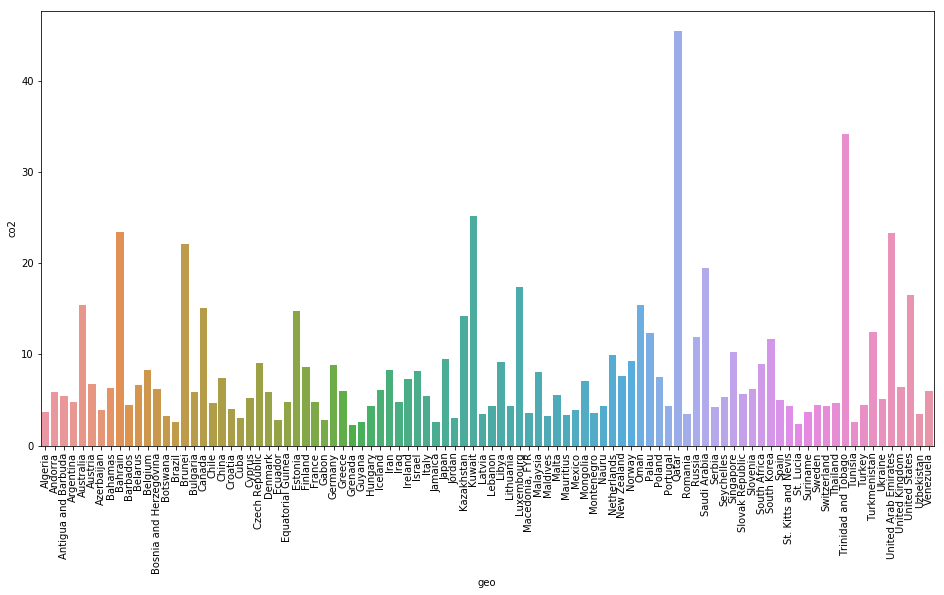

In [43]:
# plot per capita co2 emissions
co2 = co2[co2["co2"] > median_per_capita_co2]
plt.figure(figsize=(16, 8))
sns.barplot(x="geo", y="co2", data=co2)
plt.xticks(rotation=90)

In [44]:
# income 
income = pd.read_csv("co2_prediction/income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
income = income[["geo", year]]
income.columns = ["geo", "income"]
income.head()

,geo,income
0,Afghanistan,1780
1,Albania,10700
2,Algeria,13500
3,Andorra,44900
4,Angola,6260


In [45]:
# merge with co2 df
df = pd.merge(co2, income, on='geo', how='inner')
df.head()

,geo,co2,income
0,Algeria,3.72,13500
1,Andorra,5.83,44900
2,Antigua and Barbuda,5.38,19500
3,Argentina,4.75,18800
4,Australia,15.40,43400


Text(0,0.5,'co2')

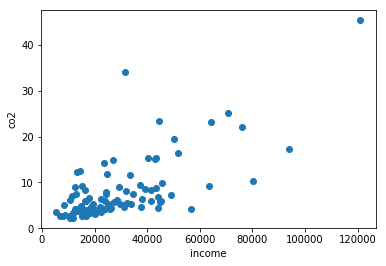

In [46]:
# plot per capita income and co2
plt.scatter(df['income'], df['co2'])
plt.xlabel('income')
plt.ylabel('co2')

In [47]:
# forest
forest = pd.read_csv("co2_prediction/forest_coverage_percent.csv")
forest = forest[["geo", year]]
forest.columns = ["geo", "forest"]
forest.head()

,geo,forest
0,Afghanistan,2.07
1,Albania,28.20
2,Algeria,0.82
3,Andorra,34.00
4,Angola,46.50


In [48]:
# merge forest with the df above
df = pd.merge(df, forest, how="inner",
             left_on="geo", right_on="geo")
df.head()

,geo,co2,income,forest
0,Algeria,3.72,13500,0.82
1,Andorra,5.83,44900,34.00
2,Antigua and Barbuda,5.38,19500,22.30
3,Argentina,4.75,18800,10.00
4,Australia,15.40,43400,16.20


Text(0,0.5,'co2')

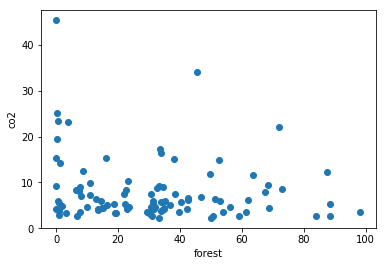

In [49]:
# plot forest and co2 
plt.scatter(df['forest'], df['co2'])
plt.xlabel('forest')
plt.ylabel('co2')

### Function to Read and Merge Files

In [50]:
# fn to read and merge dfs
import os
root_folder = "co2_prediction/"

def read_and_merge_files(root_folder, year="2010"):
    dfs = []
    for subdir, dirs, files in os.walk(root_folder):
        for file in files:
            filename = file.split(".")[0]
            df = pd.read_csv(root_folder+str(file))
            # include only datasets having more than 50 countries' data
            if year in df.columns and df.shape[0] > 50: 
                df = df[["geo", year]]
                df.columns = ["geo", filename]
                dfs.append(df)
    
    # merge all files using the key 'geo'
    master_df = dfs[0]
    for i in range(len(dfs)-1):
        master_df = pd.merge(master_df, dfs[i+1], how="inner", 
                             left_on="geo", right_on="geo")
    return master_df

In [51]:
master_df = read_and_merge_files(root_folder, year="2007")
master_df.head()

,geo,co2_emissions_tonnes_per_person,industry_percent_of_gdp,income_per_person_gdppercapita_ppp_inflation_adjusted,hydro_power_generation_per_person,electricity_generation_per_person,cars_trucks_and_buses_per_1000_persons,coal_consumption_per_cap,electricity_use_per_person,forest_coverage_percent,yearly_co2_emissions_1000_tonnes,oil_consumption_per_cap
0,Algeria,3.19,57.7,12600,0.00057,1090,NaN,0.02210,891.0,0.71,109000.0,0.376
1,Argentina,4.38,27.4,17900,0.06630,2880,314.0,0.03050,2440.0,10.80,175000.0,0.605
2,Australia,17.80,25.6,40700,0.05810,11600,653.0,2.51000,11000.0,16.40,372000.0,2.030
3,Austria,8.39,27.6,43700,0.38400,7800,557.0,0.47000,8210.0,46.70,69700.0,1.620
4,Azerbaijan,3.50,66.1,13200,0.02300,2500,NaN,0.00014,2120.0,11.30,30500.0,0.519


In [52]:
# saving the merged dataset in a CSV file
master_df.to_csv("co2_prediction_dataset", sep=',')

In [53]:
# plots
df = master_df.iloc[:, 1:]
print(df.shape)
df.head()

(56, 11)


,co2_emissions_tonnes_per_person,industry_percent_of_gdp,income_per_person_gdppercapita_ppp_inflation_adjusted,hydro_power_generation_per_person,electricity_generation_per_person,cars_trucks_and_buses_per_1000_persons,coal_consumption_per_cap,electricity_use_per_person,forest_coverage_percent,yearly_co2_emissions_1000_tonnes,oil_consumption_per_cap
0,3.19,57.7,12600,0.00057,1090,NaN,0.02210,891.0,0.71,109000.0,0.376
1,4.38,27.4,17900,0.06630,2880,314.0,0.03050,2440.0,10.80,175000.0,0.605
2,17.80,25.6,40700,0.05810,11600,653.0,2.51000,11000.0,16.40,372000.0,2.030
3,8.39,27.6,43700,0.38400,7800,557.0,0.47000,8210.0,46.70,69700.0,1.620
4,3.50,66.1,13200,0.02300,2500,NaN,0.00014,2120.0,11.30,30500.0,0.519


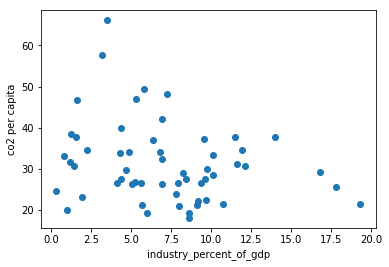

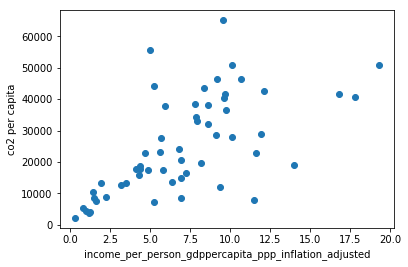

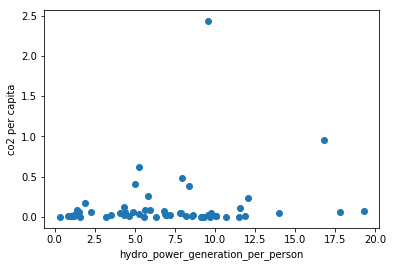

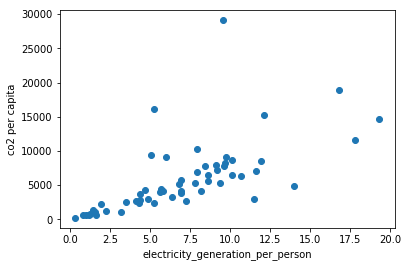

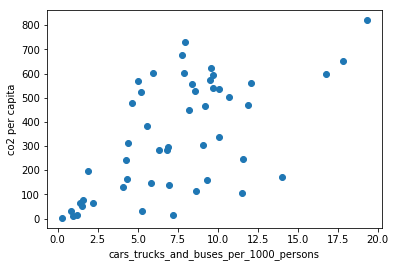

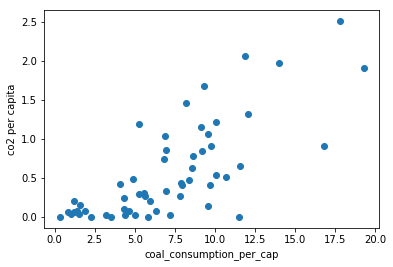

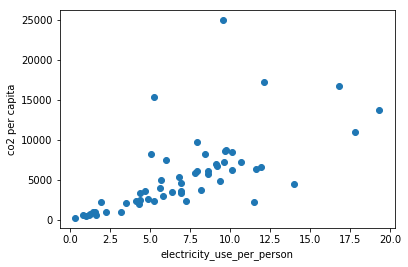

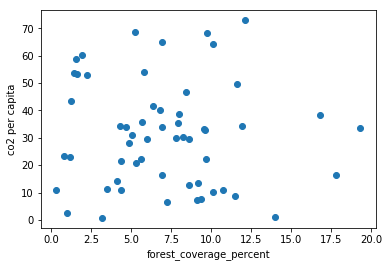

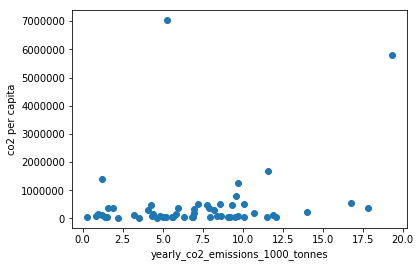

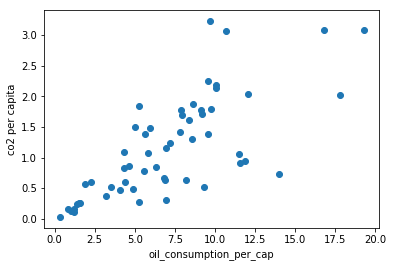

In [54]:
# plot CO2 with all other variables

plt.figure()
for col in range(1, df.shape[1]):
    plt.scatter(df["co2_emissions_tonnes_per_person"], df.iloc[:, col])
    plt.xlabel(df.columns[col])
    plt.ylabel("co2 per capita")
    plt.show()

## Regression

In [55]:
master_df = read_and_merge_files(root_folder, year="2007")
df = master_df.iloc[:, 1:]
print(df.shape)
df.head()

(56, 11)


,co2_emissions_tonnes_per_person,industry_percent_of_gdp,income_per_person_gdppercapita_ppp_inflation_adjusted,hydro_power_generation_per_person,electricity_generation_per_person,cars_trucks_and_buses_per_1000_persons,coal_consumption_per_cap,electricity_use_per_person,forest_coverage_percent,yearly_co2_emissions_1000_tonnes,oil_consumption_per_cap
0,3.19,57.7,12600,0.00057,1090,NaN,0.02210,891.0,0.71,109000.0,0.376
1,4.38,27.4,17900,0.06630,2880,314.0,0.03050,2440.0,10.80,175000.0,0.605
2,17.80,25.6,40700,0.05810,11600,653.0,2.51000,11000.0,16.40,372000.0,2.030
3,8.39,27.6,43700,0.38400,7800,557.0,0.47000,8210.0,46.70,69700.0,1.620
4,3.50,66.1,13200,0.02300,2500,NaN,0.00014,2120.0,11.30,30500.0,0.519


In [56]:
df.isna().sum()

co2_emissions_tonnes_per_person                          0
industry_percent_of_gdp                                  0
income_per_person_gdppercapita_ppp_inflation_adjusted    0
hydro_power_generation_per_person                        0
electricity_generation_per_person                        0
cars_trucks_and_buses_per_1000_persons                   6
coal_consumption_per_cap                                 0
electricity_use_per_person                               0
forest_coverage_percent                                  0
yearly_co2_emissions_1000_tonnes                         0
oil_consumption_per_cap                                  0
dtype: int64

In [57]:
# drop rows with NaNs
df = df.dropna(axis=0)
df.isna().sum()

co2_emissions_tonnes_per_person                          0
industry_percent_of_gdp                                  0
income_per_person_gdppercapita_ppp_inflation_adjusted    0
hydro_power_generation_per_person                        0
electricity_generation_per_person                        0
cars_trucks_and_buses_per_1000_persons                   0
coal_consumption_per_cap                                 0
electricity_use_per_person                               0
forest_coverage_percent                                  0
yearly_co2_emissions_1000_tonnes                         0
oil_consumption_per_cap                                  0
dtype: int64

In [58]:
df.head()

,co2_emissions_tonnes_per_person,industry_percent_of_gdp,income_per_person_gdppercapita_ppp_inflation_adjusted,hydro_power_generation_per_person,electricity_generation_per_person,cars_trucks_and_buses_per_1000_persons,coal_consumption_per_cap,electricity_use_per_person,forest_coverage_percent,yearly_co2_emissions_1000_tonnes,oil_consumption_per_cap
1,4.380,27.4,17900,0.06630,2880,314.00,0.0305,2440.0,10.8,175000.0,0.6050
2,17.800,25.6,40700,0.05810,11600,653.00,2.5100,11000.0,16.4,372000.0,2.0300
3,8.390,27.6,43700,0.38400,7800,557.00,0.4700,8210.0,46.7,69700.0,1.6200
5,0.302,24.5,2150,0.00083,211,2.26,0.0042,200.0,11.1,44400.0,0.0252
6,6.350,37.0,13500,0.00031,3340,282.00,0.0728,3390.0,41.8,60500.0,0.8410


In [59]:
y = df.loc[:, 'co2_emissions_tonnes_per_person']
X = df.loc[:, df.columns != 'co2_emissions_tonnes_per_person']

# scale
scaler = StandardScaler()
scaler.fit(X)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [60]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.8735861723318226

In [61]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8650120268535946

In [64]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.18197472590383157),
 ('industry_percent_of_gdp', 0.0975825348934213),
 ('income_per_person_gdppercapita_ppp_inflation_adjusted',
  -8.478790561802556e-05),
 ('hydro_power_generation_per_person', -1.952912933994128),
 ('electricity_generation_per_person', 0.0005396903174173402),
 ('cars_trucks_and_buses_per_1000_persons', 0.004113706320691853),
 ('coal_consumption_per_cap', 3.1291177792761418),
 ('electricity_use_per_person', -0.00022113697507994951),
 ('forest_coverage_percent', -0.04652215120285473),
 ('yearly_co2_emissions_1000_tonnes', -8.064496620188717e-08),
 ('oil_consumption_per_cap', 2.6895161257489297)]

### Lasso

In [75]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8735823438313447
0.8633907280007007


In [76]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.174),
 ('industry_percent_of_gdp', 0.097),
 ('income_per_person_gdppercapita_ppp_inflation_adjusted', -0.0),
 ('hydro_power_generation_per_person', -1.862),
 ('electricity_generation_per_person', 0.001),
 ('cars_trucks_and_buses_per_1000_persons', 0.004),
 ('coal_consumption_per_cap', 3.139),
 ('electricity_use_per_person', -0.0),
 ('forest_coverage_percent', -0.047),
 ('yearly_co2_emissions_1000_tonnes', -0.0),
 ('oil_consumption_per_cap', 2.689)]

In [77]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [78]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003110,0.000513,0.000735,0.000301,0.001,{'alpha': 0.001},0.935560,-0.055948,0.704199,0.544443,...,0.457449,0.360471,1,0.841724,0.895448,0.847599,0.904348,0.918052,0.881434,0.030932
1,0.002203,0.000243,0.000479,0.000137,0.01,{'alpha': 0.01},0.935914,-0.097058,0.697966,0.557683,...,0.455295,0.368827,2,0.841299,0.895310,0.846862,0.904107,0.917663,0.881048,0.031063
2,0.001789,0.000195,0.000470,0.000121,1,{'alpha': 1.0},0.770542,-1.277144,-0.421039,0.636025,...,-0.150158,0.762199,5,0.649668,0.741750,0.755627,0.685230,0.801845,0.726824,0.053598
3,0.001699,0.000081,0.000454,0.000079,5,{'alpha': 5.0},0.738925,-0.845850,-0.255140,0.532752,...,-0.036306,0.587854,4,0.620371,0.711547,0.712526,0.662262,0.769657,0.695273,0.050588
4,0.002634,0.001173,0.000704,0.000420,10,{'alpha': 10.0},0.708542,-0.740269,-0.252059,0.493458,...,-0.016536,0.536874,3,0.605976,0.694514,0.694205,0.649834,0.758211,0.680548,0.050828


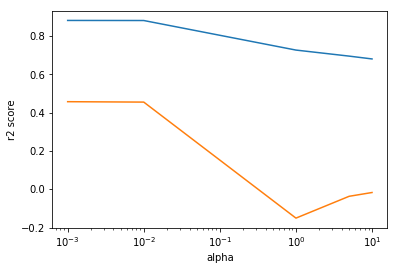

In [79]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [80]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8735823438313447
0.8633907280007007


In [81]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.174),
 ('industry_percent_of_gdp', 0.097),
 ('income_per_person_gdppercapita_ppp_inflation_adjusted', -0.0),
 ('hydro_power_generation_per_person', -1.862),
 ('electricity_generation_per_person', 0.001),
 ('cars_trucks_and_buses_per_1000_persons', 0.004),
 ('coal_consumption_per_cap', 3.139),
 ('electricity_use_per_person', -0.0),
 ('forest_coverage_percent', -0.047),
 ('yearly_co2_emissions_1000_tonnes', -0.0),
 ('oil_consumption_per_cap', 2.689)]